datasetlink: https://drive.google.com/drive/folders/14D13kkzWa6EbOC37JLHkUupfYeUXUcXB

In [ ]:
# from google.colab import drive
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load the dataset to analyze its structure
file_path = '/content/drive/MyDrive/CSE422/weather_classification_data.csv'

#file_path = '/content/weather_classification_data.csv'
weather_df= pd.read_csv(file_path)

In [ ]:
# Display the first few rows and general information about the dataset
data_info = weather_df.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
weather_df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [ ]:
weather_df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64
Equal distribution across classes: True


<ipython-input-6-c78516d8de40>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(class_distribution))


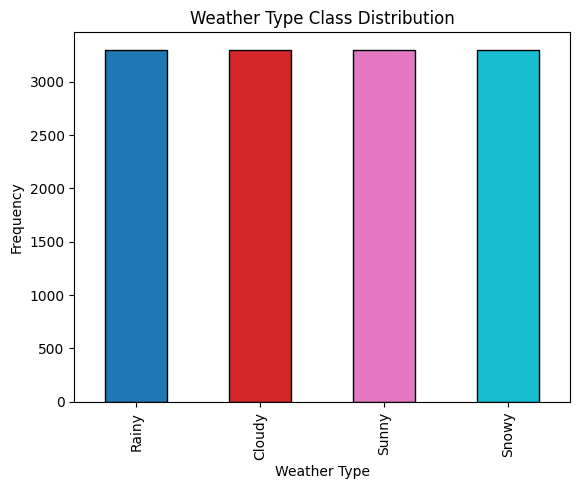

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'weather_df' is your dataframe and 'Weather Type' is the output column
class_distribution = weather_df['Weather Type'].value_counts()

# Display the class distribution
print(class_distribution)

# Check if the classes have equal numbers
equal_distribution = class_distribution.nunique() == 1
print("Equal distribution across classes:", equal_distribution)

# Define a color palette for each class
colors = plt.cm.get_cmap('tab10', len(class_distribution))

# Plot the bar chart for class distribution with different colors for each class
class_distribution.plot(kind='bar', color=colors(range(len(class_distribution))), edgecolor='black')

# Add labels and title
plt.title('Weather Type Class Distribution')
plt.xlabel('Weather Type')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Encode categorical variables
label_encoders = {}  # To store label encoders for later use if needed

# Label encode 'Cloud Cover', 'Season', 'Location', 'Weather Type'
for col in ['Cloud Cover', 'Season', 'Location', 'Weather Type']:
    label_encoders[col] = LabelEncoder()
    weather_df[col] = label_encoders[col].fit_transform(weather_df[col])




In [ ]:
# Step 2: Scale numerical features
scaler = StandardScaler()
numerical_columns = ['Temperature', 'Humidity', 'Wind Speed',
                     'Precipitation (%)', 'Atmospheric Pressure',
                     'UV Index', 'Visibility (km)']

weather_df[numerical_columns] = scaler.fit_transform(weather_df[numerical_columns])



In [ ]:
# Correlation matrix and threshold
correlation_matrix = weather_df.corr()
correlation_threshold = 0.9

# Find highly correlated features
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
highly_correlated = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]



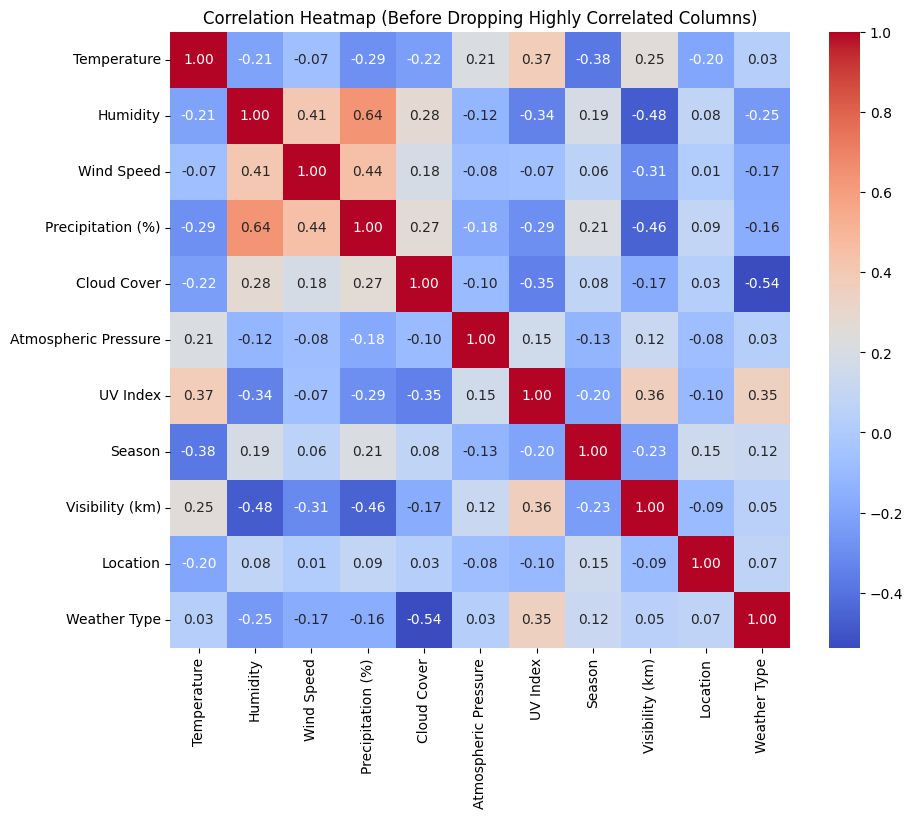

In [ ]:
# Plot heatmap before dropping columns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Before Dropping Highly Correlated Columns)")
plt.show()


In [ ]:
# Drop highly correlated features
data_dropped = weather_df.drop(columns=highly_correlated)


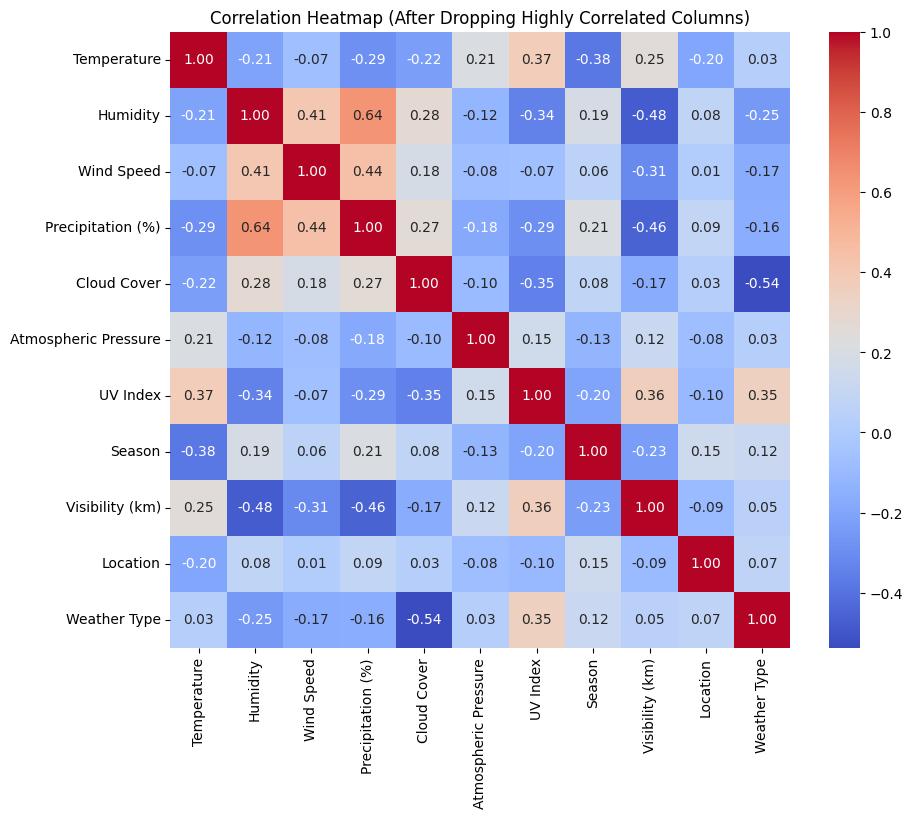

In [ ]:
# Plot heatmap after dropping columns
correlation_matrix_dropped = data_dropped.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_dropped, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (After Dropping Highly Correlated Columns)")
plt.show()

In [ ]:
# Step 3: Split the data into features (X) and target (y)
X = weather_df.drop(columns=['Weather Type'])  # Features
y = weather_df['Weather Type'] # Target variable



In [ ]:
# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



In [ ]:
print(data_dropped.columns)


Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')


In [ ]:
weather_df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,-0.294931,0.212404,-0.048086,0.887629,3,0.134203,-0.520104,3,-0.582231,1,1
1,1.143035,1.351385,-0.192836,0.543291,3,0.150602,0.776424,1,1.345768,1,0
2,0.625367,-0.233285,-0.409962,-1.178401,0,0.346579,0.257813,1,0.010999,2,3
3,1.085516,0.707613,-1.206089,0.887629,0,0.549008,0.776424,1,-1.323769,0,3
4,0.452811,0.261924,1.037543,0.386773,2,-0.407490,-0.779410,3,-0.878846,2,1


In [ ]:
#weather_df.to_csv('Model_runable_dataset.csv', index=False)

Models

1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Train logistic regression model
logistic_model = LogisticRegression(max_iter=100, random_state=42)
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)


# Calculate precision, recall, and f1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = logistic_model.score(X_test, y_test)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)



Accuracy: 0.8558080808080808
Precision: 0.8562312069373538
Recall: 0.8558080808080808
F1-Score: 0.855677503311376


Graph

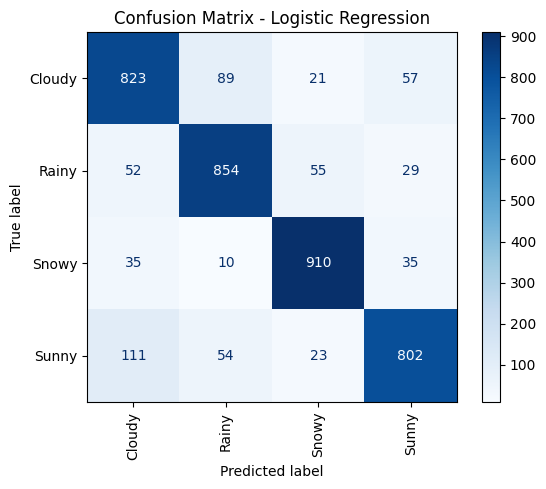

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=label_encoders['Weather Type'].classes_)
disp.plot(cmap="Blues", xticks_rotation="vertical")

# Show the plot and classification report
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


2.Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate precision, recall, F1-score, and accuracy for Random Forest
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
accuracy_rf = rf_model.score(X_test, y_test)

# Print the results
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_rf)




Accuracy: 0.9131313131313131
Precision: 0.9141955188473782
Recall: 0.9131313131313131
F1-Score: 0.9133802386360708


Graph

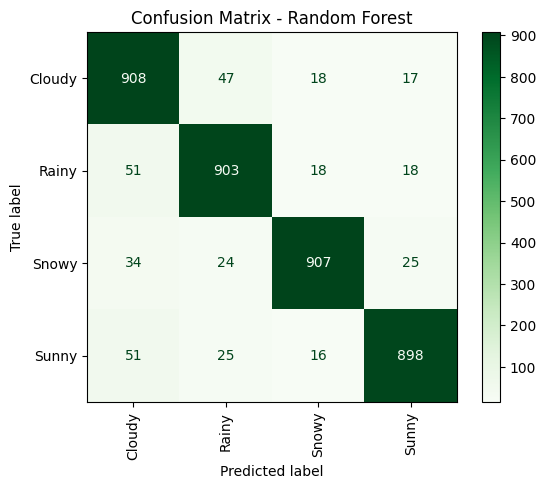

In [ ]:
# Plot the confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(conf_matrix_rf, display_labels=label_encoders['Weather Type'].classes_)
disp_rf.plot(cmap="Greens", xticks_rotation="vertical")

# Show the plot and return metrics
plt.title("Confusion Matrix - Random Forest")
plt.show()

3. Dicision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate precision, recall, F1-score, and accuracy for Decision Tree
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
accuracy_dt = dt_model.score(X_test, y_test)

# Print the results
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-Score:", f1_dt)


Accuracy: 0.9045454545454545
Precision: 0.9048284862442157
Recall: 0.9045454545454545
F1-Score: 0.904644596597514


Graph

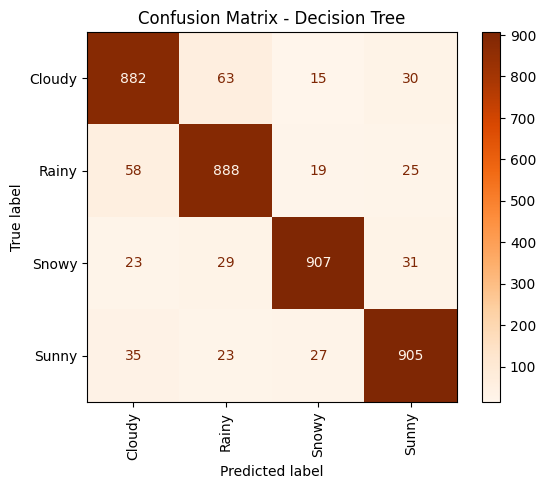

In [ ]:
# Plot the confusion matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(conf_matrix_dt, display_labels=label_encoders['Weather Type'].classes_)
disp_dt.plot(cmap="Oranges", xticks_rotation="vertical")

# Show the plot and return metrics
plt.title("Confusion Matrix - Decision Tree")
plt.show()



4.KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train K-Nearest Neighbors (KNN) Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate precision, recall, F1-score, and accuracy for KNN
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
accuracy_knn = knn_model.score(X_test, y_test)

# Print the results
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-Score:", f1_knn)

Accuracy: 0.9025252525252525
Precision: 0.90407465161879
Recall: 0.9025252525252525
F1-Score: 0.9028814502773103


Graph

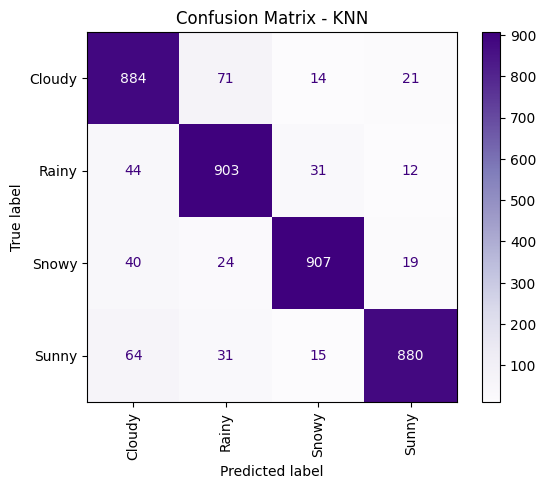

In [ ]:
# Plot the confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(conf_matrix_knn, display_labels=label_encoders['Weather Type'].classes_)
disp_knn.plot(cmap="Purples", xticks_rotation="vertical")

# Show the plot and return metrics
plt.title("Confusion Matrix - KNN")
plt.show()



All model result graph

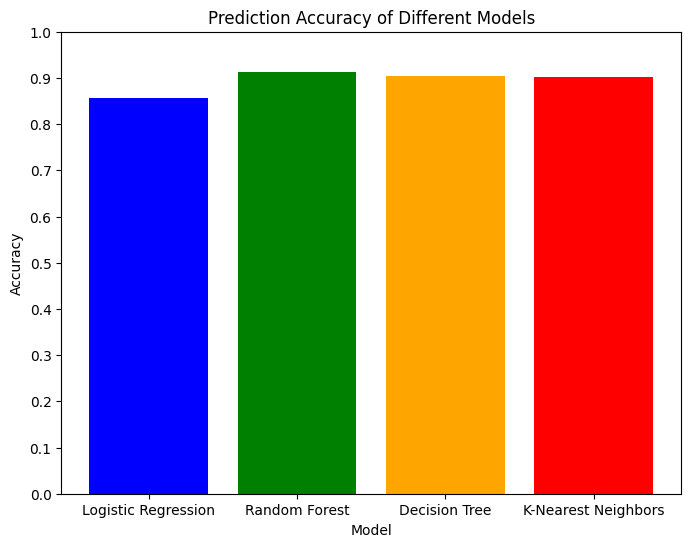

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'K-Nearest Neighbors']

# Accuracy scores for each model
accuracies = [accuracy, accuracy_rf, accuracy_dt, accuracy_knn]

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy of Different Models')

# Set detailed y-axis ticks
plt.yticks([i / 10.0 for i in range(0, 11)], [f'{i / 10.0:.1f}' for i in range(0, 11)])

# Display the bar chart
plt.show()
